<a href="https://colab.research.google.com/github/Motunrayo244/EDISS-MP/blob/main/Lab1_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WEB SCRAPING WITH BEAUTIFUL SOUP
This is an exercise demonstrating the use of the beautiful soup library for web scrapping. Food recipe data was scrapped from the first 30 pages of https://www.skinnytaste.com/recipe-index/.
Some of the features gotten from the website are as follows:
- Recipe name
- Image URL of the recipe
- Recipe keys
- Weight Watchers Point (WWP)
- Calories
- protein content
- Carbs content
- Fat content
- Time to Prepare recipe
- Rating of the Recipe
- Recipe Summary

The notebook is divided into three sections.
Section 1: This section scraps the data from the website and saves it into a CSV file.

Section 2: The data from section 1 is cleaned further and exploratory data analysis is carried out. The outputs of this section are charts and graphs that shows the relationship between calories and WPP, as well as the distribution of the 14 recipe keys available on the website.

Section 3: This section is a simple program that allows you to enter in a range of calories and WWP then returns a list of the top five recipes with the lowest calories and wpp respectively.

### Section 1 Web Scrapping

This section uses BeautifulSoup library to scrapd recipe data from  https://www.skinnytaste.com/recipe-index/. The output of this section is a CSV file containg the scrapped data in it's raw form.


In [ ]:
# import the libraries
from bs4 import BeautifulSoup
import requests
import csv
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from os.path  import basename
from IPython.display import HTML

In [ ]:
#open a csv file named tasty_soup.csv.
#Using the write row method,write the header of the csv file.
csv_file = open('tasty_soup.csv','w', encoding='utf-8')
csv_writer = csv.writer(csv_file)
csv_writer.writerow(['name','image_url','recipe_keys','recipe_wpp','recipe_cal', 'recipe_protein','recipe_carbs', 'recipe_fat',
                     'recipe_time', 'recipe_ratings','num_of_rating','recipe_share_count','recipe_summary'])

164

In [ ]:
# use the request.get funtion to reach the website and get the source code. then use beautiful soup to get data from the individual elements.
# The first 30 recipe pages were scrapped so we used a loop to go through the pages
for i in range(1,31):
    source = requests.get(f"https://www.skinnytaste.com/recipe-index/?_paged={i}").text

    soup = BeautifulSoup(source,'lxml')


    page_articles = soup.find_all(name='div', class_='post-thumb-img-content post-thumb')

    for article in page_articles:

        recipe_image= article.find('img', class_='attachment-teaser size-teaser wp-post-image')['src']
        recipe_image_url = recipe_image
        link = (article.find('a')['href'])
        recipe_post = requests.get(link).text
        recipe_soup = BeautifulSoup(recipe_post,'lxml')

        recipe_name = recipe_soup.find('h1', class_='entry-title').text

        key_list = recipe_soup.find('ul', class_='recipe-type-post-icons')
        recipe_keys = ([key.find('a')['title'] for key in key_list])

        pp = recipe_soup.find('span', class_='recipe-meta-value recipe-ww-pp icon')
        recipe_wpp = pp.text if pp != None else ""

        calories = recipe_soup.find('span', class_='recipe-meta-value value-calories')
        recipe_cal = calories.text.split(' ')[1] if calories != None else ""


        protein = recipe_soup.find('span', class_='recipe-meta-value value-protein')
        recipe_protein = protein.text.split(' ')[1] if protein != None else ""

        carbs = recipe_soup.find('span', class_='recipe-meta-value value-carbs')
        recipe_carbs = carbs.text.split(' ')[1] if carbs != None else ""

        fats = recipe_soup.find('span', class_='recipe-meta-value value-fat')
        recipe_fat = fats.text.split(' ')[1] if fats != None else ""

        time = recipe_soup.find('span', class_='wprm-total-time')
        recipe_time = time.text if time!= None else ""

        rating = recipe_soup.find('span', class_= 'post-rating').text
        if rating != ' Rate this post!':
            recipe_ratings = rating.split(' ')[0]
            num_of_ratings = rating.split(' ')[2]
        else:
            recipe_ratings = 0
            num_of_ratings = 0

        share_count = recipe_soup.find('span', class_="dpsp-total-share-count")
        recipe_share_count = share_count.text if share_count != None else ""

        summary = recipe_soup.find('div', class_='wprm-recipe-summary wprm-block-text-normal')
        recipe_summary = summary.text if summary != None else ""


        csv_writer.writerow([recipe_name,recipe_image_url,recipe_keys,recipe_wpp,recipe_cal, recipe_protein,recipe_carbs, recipe_fat,
                        recipe_time, recipe_ratings,num_of_ratings,recipe_share_count,recipe_summary])


csv_file.close() # close the CSV file

### Section 2 Exploratory Data Analysis (EDA)

This section is divided into two parts:
1. Data Cleaning
2. Data Analysis

#### Data Cleaning:
The data collected from the website is read into a dataframe. From the data it was observed that there were some articles contains other write ups  and aren't single recipe (https://www.skinnytaste.com/healthy-cottage-cheese-recipes/). These data points were removed as they do not have values for calories, or wpp.

The data extracted from the first 30 pages has 600 rows and 13 columns.

In [ ]:
data = pd.read_csv('tasty_soup.csv') #Load data csv

In [ ]:
print(f"The data extracted has {data.shape[0]} rows and {data.shape[1]} columns.")

The data extracted has 600 rows and 13 columns.


In [ ]:
data.head(2) #View of the first 2 rows in the data frame

,name,image_url,recipe_keys,recipe_wpp,recipe_cal,recipe_protein,recipe_carbs,recipe_fat,recipe_time,recipe_ratings,num_of_rating,recipe_share_count,recipe_summary
0,Pumpkin Chocolate Chip Cookies,https://www.skinnytaste.com/wp-content/uploads...,"['Kid Friendly', 'Under 30 Minutes', 'Vegetari...",5.0,95.0,2.5,25.5,3.5,25 mins,0.0,0,NaN,"These soft Pumpkin Chocolate Chip Cookies, mad..."
1,The 4 Best Olive Oil Sprayers of 2023,https://www.skinnytaste.com/wp-content/uploads...,[],NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN


In [ ]:
#list the columns in the dataframe
data.columns.to_list()

['name',
 'image_url',
 'recipe_keys',
 'recipe_wpp',
 'recipe_cal',
 'recipe_protein',
 'recipe_carbs',
 'recipe_fat',
 'recipe_time',
 'recipe_ratings',
 'num_of_rating',
 'recipe_share_count',
 'recipe_summary']

In [ ]:
#shows the data type of all the columns in the dataframe.
# From this it was observed that recipe time is an object so it needs to be cleaned so it can become a numerical data for analysis.
data.dtypes

name                   object
image_url              object
recipe_keys            object
recipe_wpp            float64
recipe_cal            float64
recipe_protein        float64
recipe_carbs          float64
recipe_fat            float64
recipe_time            object
recipe_ratings        float64
num_of_rating           int64
recipe_share_count    float64
recipe_summary         object
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                600 non-null    object 
 1   image_url           600 non-null    object 
 2   recipe_keys         600 non-null    object 
 3   recipe_wpp          561 non-null    float64
 4   recipe_cal          563 non-null    float64
 5   recipe_protein      562 non-null    float64
 6   recipe_carbs        560 non-null    float64
 7   recipe_fat          557 non-null    float64
 8   recipe_time         565 non-null    object 
 9   recipe_ratings      600 non-null    float64
 10  num_of_rating       600 non-null    int64  
 11  recipe_share_count  589 non-null    float64
 12  recipe_summary      576 non-null    object 
dtypes: float64(7), int64(1), object(5)
memory usage: 61.1+ KB


In [ ]:
# This is a removes rows that have NaN values.
recipe_data = data.dropna(subset = ['recipe_cal', 'recipe_wpp','recipe_time'], inplace=False)
# recipe_data = data[data['recipe_cal', 'recipe_wpp'].notna()]

In [ ]:
print(f"The recipe data  has {recipe_data.shape[0]} rows and {recipe_data.shape[1]} columns.\n")

The recipe data  has 559 rows and 13 columns.



In [ ]:
print(f"The recipe data  has {recipe_data.shape[0]} rows and {recipe_data.shape[1]} columns.\n")
print(f"{data.shape[0] - recipe_data.shape[0]}  row(s) were removed from the original data.")

The recipe data  has 559 rows and 13 columns.

41  row(s) were removed from the original data.


In [ ]:
#resrt the index of recipe_data
recipe_data= recipe_data.reset_index(drop=True)

In [ ]:
recipe_data.head(2)

,name,image_url,recipe_keys,recipe_wpp,recipe_cal,recipe_protein,recipe_carbs,recipe_fat,recipe_time,recipe_ratings,num_of_rating,recipe_share_count,recipe_summary
0,Pumpkin Chocolate Chip Cookies,https://www.skinnytaste.com/wp-content/uploads...,"['Kid Friendly', 'Under 30 Minutes', 'Vegetari...",5.0,95.0,2.5,25.5,3.5,25 mins,0.0,0,NaN,"These soft Pumpkin Chocolate Chip Cookies, mad..."
1,Coconut Curry Butternut Squash Soup,https://www.skinnytaste.com/wp-content/uploads...,"['Dairy Free', 'Gluten Free', 'Under 30 Minute...",2.0,108.0,2.0,14.5,5.0,25 mins,5.0,16,858.0,"Coconut milk, curry and Indian spices complime..."


In [ ]:
# Determine if all the names of recipe are unique. this is to check if there are any duplicates.
len(recipe_data.name.unique())

559

In [ ]:
#remove the '[]' from the recipe key column
recipe_data['recipe_keys'] = recipe_data['recipe_keys']. apply(lambda x: x.replace('[',''))
recipe_data['recipe_keys'] = recipe_data['recipe_keys']. apply(lambda x: x.replace(']',''))

In [ ]:
'''This converts the time string into hour equivalent. The time field extracted is in the format "x hr(s) y mins".
 The approach is to split the string  by the space " " character into a list, then access the individual parts of the time.
 The function returns a float datatype '''
def convert_to_hrs(time:str)->float:
    time_parts =time.split(' ')
    if len(time_parts)>2 and 'hrs' in time:
        return float(float(time_parts[0]) + float(int(time_parts[2])/60))
    elif len(time_parts)==2 and 'hr' in time:
        return float(time_parts[0])
    else:
        return float(int(time_parts[0])/60)

In [ ]:
'''This function is used to determine if a recipe has a particular recipe key or not.
The function take two argument, the list of recipe keys and the particular recipe key we intend to find.
If the function finds the recipe key in the list, it returns 1 otherwise, it returns 0 '''
def det_recipe_key(recipe_keys:str, recipe_key)->bool:
    return 1 if recipe_key in recipe_keys else 0

In [ ]:
recipe_data['recipe_time'] = recipe_data['recipe_time']. apply(convert_to_hrs)

In [ ]:
recipe_data['airfryer_recipe']= recipe_data.apply(lambda x: det_recipe_key(x['recipe_keys'],'Air Fryer Recipes'), axis=1)
recipe_data['Freezer_meal'] = recipe_data.apply(lambda x: det_recipe_key(x['recipe_keys'], 'Freezer Meals' ), axis=1)
recipe_data['keto_recipe'] = recipe_data.apply(lambda x: det_recipe_key(x['recipe_keys'],'Keto Recipes' ), axis=1)
recipe_data['low_carbs'] = recipe_data.apply(lambda x: det_recipe_key(x['recipe_keys'],'Low Carb' ), axis=1)
recipe_data['paleo'] = recipe_data.apply(lambda x: det_recipe_key(x['recipe_keys'],'Paleo' ), axis=1)
recipe_data['slow_cooker_recipe'] = recipe_data.apply(lambda x: det_recipe_key(x['recipe_keys'],'Slow Cooker'), axis=1)
recipe_data['vegetarian_meal'] = recipe_data.apply(lambda x: det_recipe_key(x['recipe_keys'],'Vegetarian'), axis=1)
recipe_data['dairy_free'] = recipe_data.apply(lambda x: det_recipe_key(x['recipe_keys'],'Dairy'), axis=1)
recipe_data['gluten_free'] = recipe_data.apply(lambda x: det_recipe_key(x['recipe_keys'],'Gluten'), axis=1)
recipe_data['kid_friendly'] = recipe_data.apply(lambda x: det_recipe_key(x['recipe_keys'],'Kid Friendly'), axis=1)
recipe_data['meal_prep_recipes'] = recipe_data.apply(lambda x: det_recipe_key(x['recipe_keys'],'Meal Prep'), axis=1)
recipe_data['pressure_cooker_recipes'] = recipe_data.apply(lambda x: det_recipe_key(x['recipe_keys'],'Pressure'), axis=1)
recipe_data['under30_minutes'] = recipe_data.apply(lambda x: det_recipe_key(x['recipe_keys'],'Under 30'), axis=1)
recipe_data['whole30_recipes'] = recipe_data.apply(lambda x: det_recipe_key(x['recipe_keys'],'Whole30'), axis=1)

In [ ]:
recipe_data.head(3)

,name,image_url,recipe_keys,recipe_wpp,recipe_cal,recipe_protein,recipe_carbs,recipe_fat,recipe_time,recipe_ratings,...,paleo,slow_cooker_recipe,vegetarian_meal,dairy_free,gluten_free,kid_friendly,meal_prep_recipes,pressure_cooker_recipes,under30_minutes,whole30_recipes
0,Pumpkin Chocolate Chip Cookies,https://www.skinnytaste.com/wp-content/uploads...,"'Kid Friendly', 'Under 30 Minutes', 'Vegetaria...",5.0,95.0,2.5,25.5,3.5,0.416667,0.0,...,0,0,1,0,0,1,0,0,1,0
1,Coconut Curry Butternut Squash Soup,https://www.skinnytaste.com/wp-content/uploads...,"'Dairy Free', 'Gluten Free', 'Under 30 Minutes...",2.0,108.0,2.0,14.5,5.0,0.416667,5.0,...,0,0,1,1,1,0,0,0,1,0
2,Pumpkin Bread Recipe,https://www.skinnytaste.com/wp-content/uploads...,"'Dairy Free', 'Vegetarian Meals'",5.0,103.0,2.1,18.7,2.2,0.016667,4.9,...,0,0,1,1,0,0,0,0,0,0


#### Exploratory Data Analysis

From this section we have 542 recipe data.

| S/N | Recipe_attributes |Max_value |Min_Value | Mean  |Median |Std |
|---  |------------------ |--------  | ---------|-------|-----|---|
|1.   |Recipe_wpp|12|0|4.9|5.0|2.7|
|2.   |Recipe_cal|608.0|8.0|242.83|235|117.42|



##### Key Findings from EDA

- Recipes with the lowest calories also had low ww points (i.e points less than 4).
- Recipes with higher calories are more likely to have higher WW Point.
- There is a high concentration of recipes with calories between (100 - 300). and WW point(2-7).
- There are also outlier recipe with high calory(above 400) but low WW point.
-  The minimum calories in a low WW point group is lower than the minimum in higher wpp point group. there is a form of linearity across the minimum calories in each WW Point group.
- A large percentage of the recipes have low protein point (less than 25)
- Low calories recipe (less than 200) usually have low protein, low carbs, low fat, and low wpp.
- protein distribution against carbs and fat is somewhat random.
- Recipes with low carbs content tend to have low calories and wpp also. However there are some outliers in this group.
- The distribution of recipe fat and WPP is somewhat random however recipes with fat content higher  than 20 had a good tendency to have high calory and high WPP.
- Recipes in the upper range of fat and protein also then to have a high WW point.

Other observation are written as comment in each cell of the distribution.

In [ ]:
recipe_data.describe() #shows the statistical distribution of the numerical variables in the recipe_data dataframe

,recipe_wpp,recipe_cal,recipe_protein,recipe_carbs,recipe_fat,recipe_time,recipe_ratings,num_of_rating,recipe_share_count,airfryer_recipe,...,paleo,slow_cooker_recipe,vegetarian_meal,dairy_free,gluten_free,kid_friendly,meal_prep_recipes,pressure_cooker_recipes,under30_minutes,whole30_recipes
count,559.000000,559.000000,558.000000,556.000000,553.000000,559.000000,559.000000,559.000000,558.000000,559.000000,...,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000
mean,4.944544,242.831843,18.487097,22.676799,9.267902,0.684198,4.841163,30.865832,11129.747312,0.114490,...,0.064401,0.026834,0.447227,0.483005,0.738819,0.558140,0.173524,0.033989,0.522361,0.121646
std,2.735431,117.422843,13.948303,15.958170,5.776466,1.156825,0.441786,34.261982,18947.656444,0.318691,...,0.245685,0.161742,0.497653,0.500159,0.439672,0.497053,0.379039,0.181364,0.499947,0.327169
min,0.000000,8.000000,0.500000,0.500000,0.100000,0.016667,0.000000,0.000000,300.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,153.500000,6.000000,9.500000,5.000000,0.250000,4.830000,11.000000,3016.250000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000,229.000000,16.500000,20.250000,8.000000,0.416667,4.920000,21.000000,5938.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,7.000000,314.000000,28.000000,32.000000,12.500000,0.700000,5.000000,39.000000,12365.500000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,12.000000,608.000000,68.500000,96.000000,39.000000,9.250000,5.000000,406.000000,330939.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

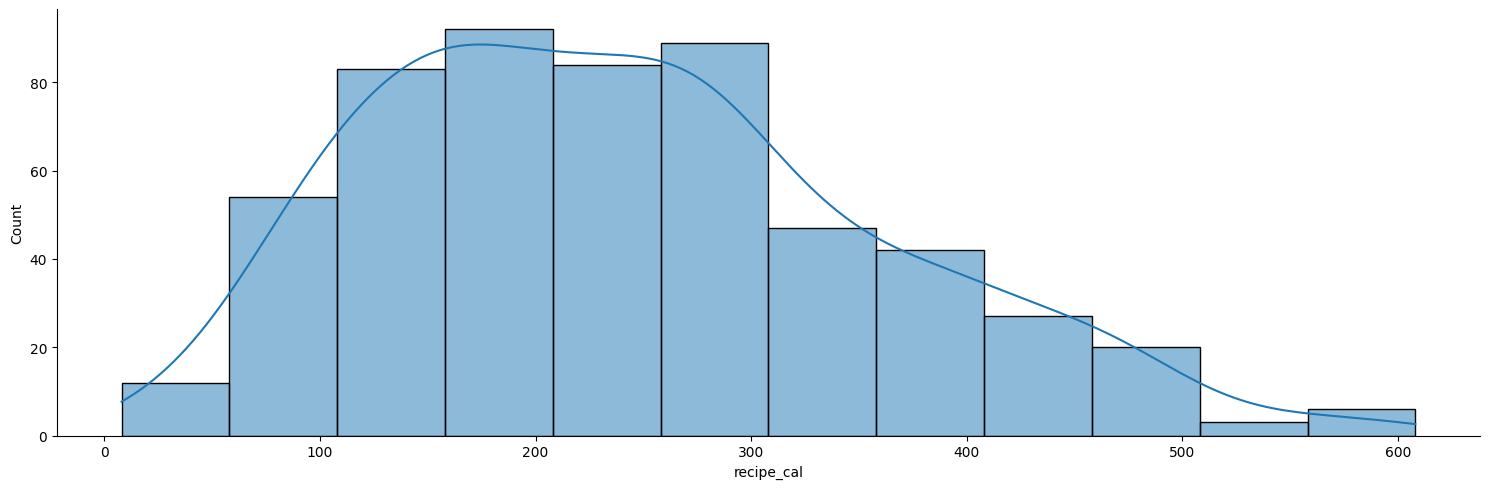

In [ ]:
# Shows the distribution of calories in the recipes
# From the histogram, a higher percentage of the recipes have calories lower or equal to 300
sns.displot(recipe_data['recipe_cal'], kde=True,bins=12,aspect=3,legend=True)

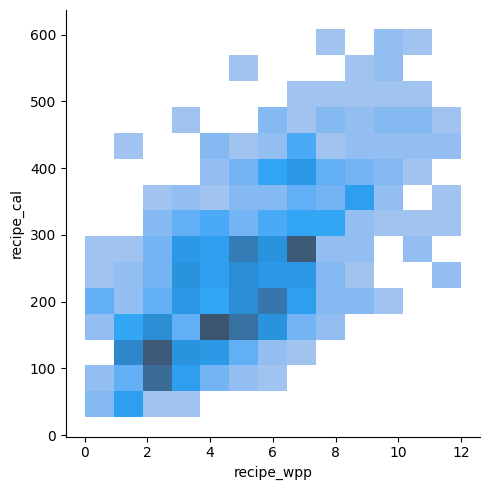

In [ ]:
# A distribution showing the relationship of recipe calories and the wwp point.
# The plot shows that recipes with the lowest calories also had low ww points (i.e points less than 4)
# The plot also shows that food with higher calories are more likely to have higher WW Point.
# there is a high concentration of food with calories between (100 - 300) and WW point(2-7)
# There are also outliere recipe with high calory(above 400) but low WW point
sns.displot(data=recipe_data, x='recipe_wpp', y='recipe_cal')

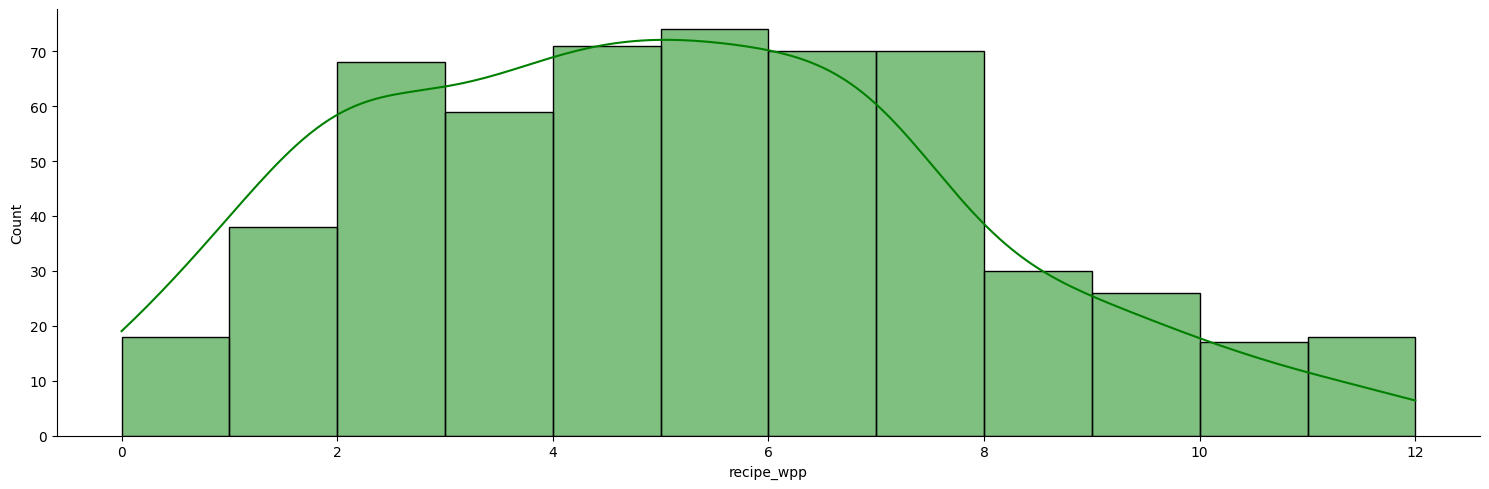

In [ ]:
# Shows the distribution of recipe WW point.
# There is a large concentration of recipes in WPP between 2 and 8
sns.displot(recipe_data['recipe_wpp'], kde=True,bins=12,aspect=3,legend=True,color='green')

<Axes: xlabel='recipe_wpp', ylabel='recipe_cal'>

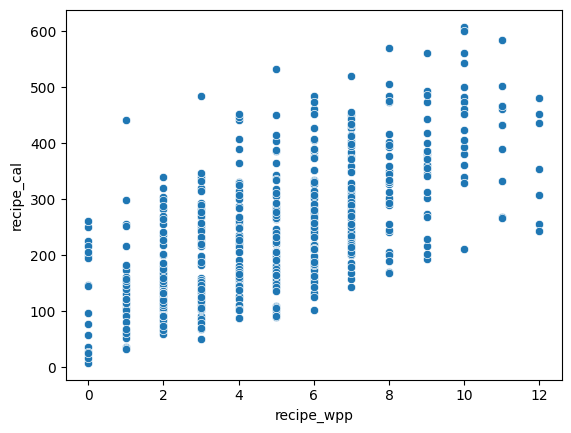

In [ ]:
# shows the distribution of calories over various wpp point in another view
# with this view the linearity of the minimum calories across each WW point is more visible
sns.scatterplot(data=recipe_data, x='recipe_wpp', y='recipe_cal')

<Axes: xlabel='recipe_wpp', ylabel='recipe_cal'>

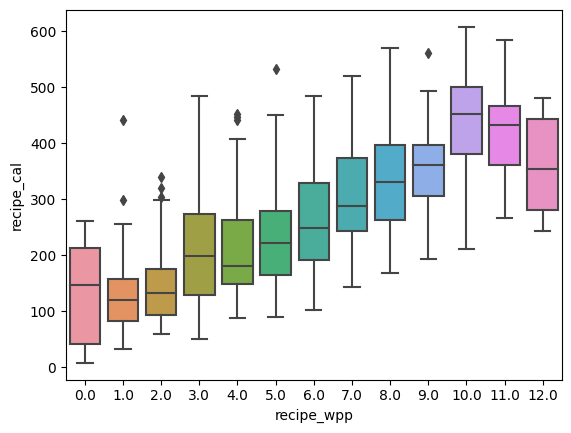

In [ ]:
#Shows a box plot min, max, midian and quartile distribution of calories across all 12 WW points
# The box plot shows that recipe with a WW Point of 0 have calories less than 300, and that 50% of recipes in this 0 WWP group contains have calories that are above or equal to 50 but below 220

sns.boxplot(data=recipe_data, x='recipe_wpp', y='recipe_cal')

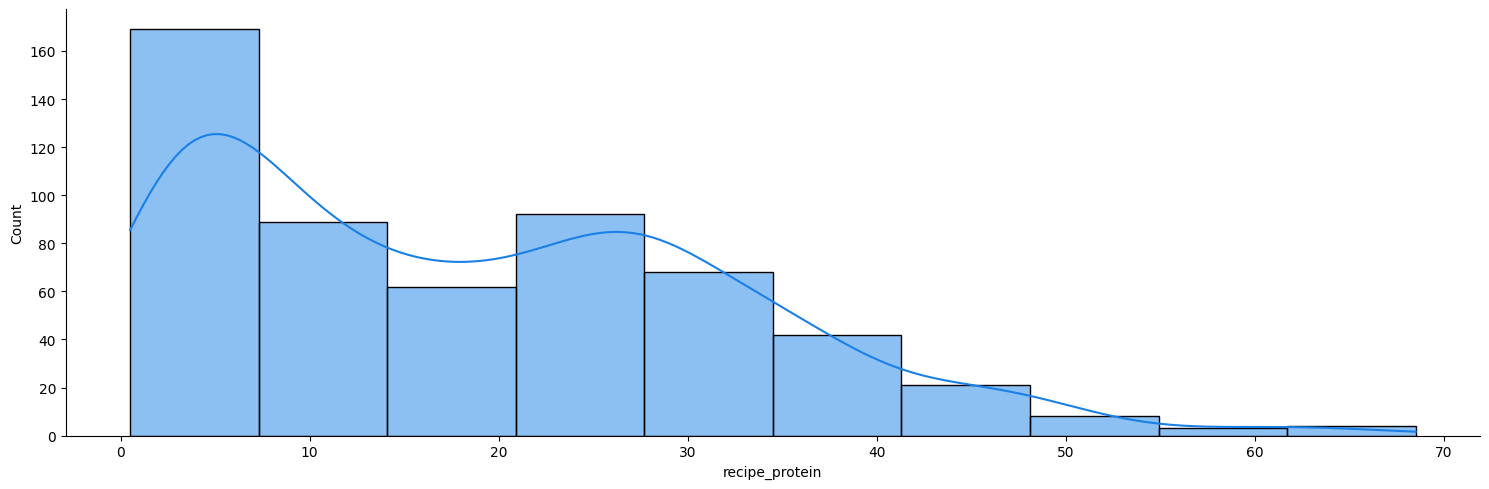

In [ ]:
#distibution of protein content in the recipe. A large percentage of the recipes have low protein point (less than 25)
sns.displot(recipe_data['recipe_protein'], kde=True,bins=10,aspect=3,legend=True,color=(0.1,0.5,0.9,1))

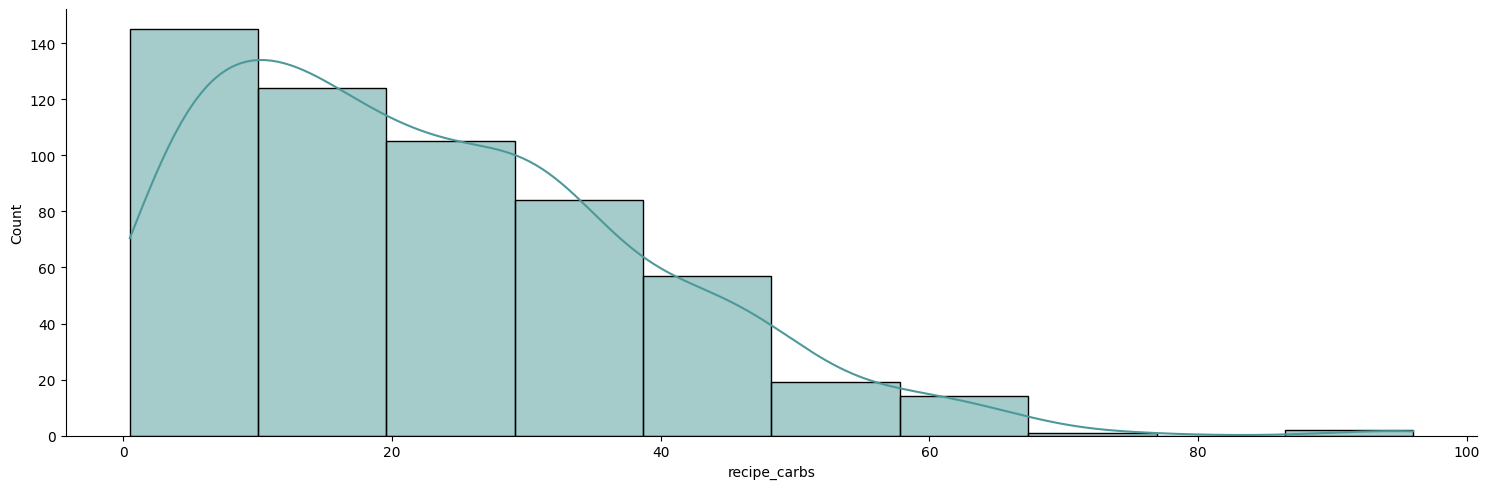

In [ ]:
#distribution of carbs in the data scrapped
sns.displot(recipe_data['recipe_carbs'], kde=True,bins=10,aspect=3,legend=True,color=(0.3,0.6,0.6,0.5))

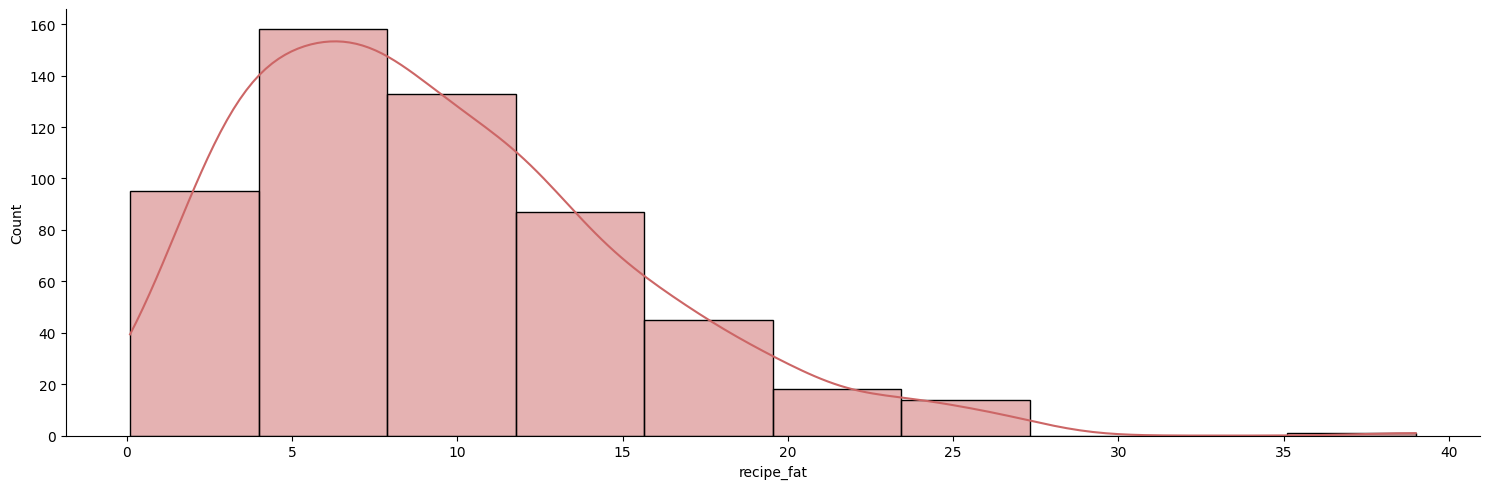

In [ ]:
# Distribution of fat in the data scraped
sns.displot(recipe_data['recipe_fat'], kde=True,bins=10,aspect=3,legend=True,color=(0.8,0.4,0.4,0.1))

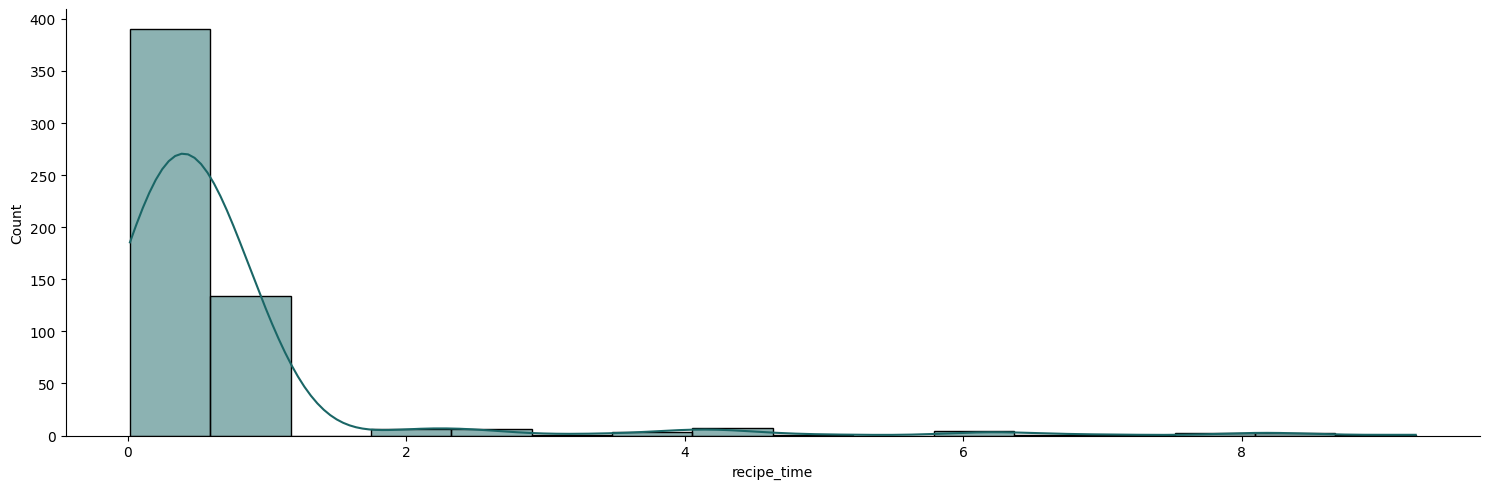

In [ ]:
# Distribution of time used to prepare the recipes scraped in hours
# over 500 (approximately 90%) of the recipes can be made in 1 hour and 66% can be prepared in 30 minutes
sns.displot(recipe_data['recipe_time'], kde=True,bins=16,aspect=3,legend=True,color=(0.1,0.4,0.4,0.2))

<Figure size 800x400 with 0 Axes>

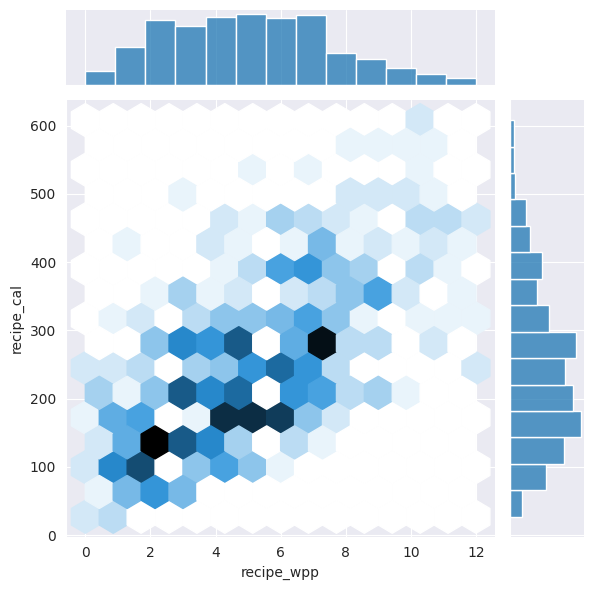

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize= (8,4))
sns.jointplot(data=recipe_data, y='recipe_cal', x='recipe_wpp', kind="hex")
plt.show()

<Figure size 640x480 with 0 Axes>

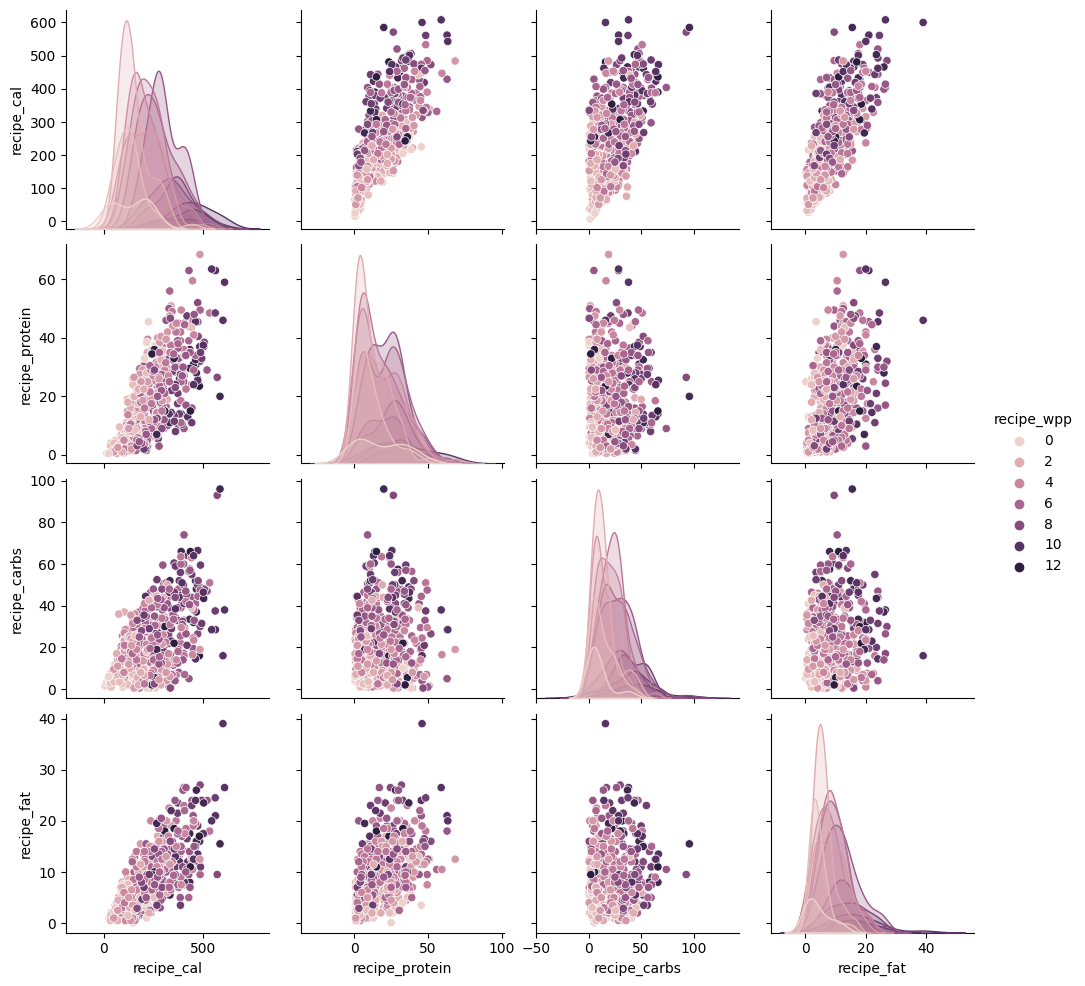

In [ ]:
# This plot show the relationship between calories, protein, carbs, fat and WW point
# Low calories food (less than 200) usually have low protein, low carbs, low fat, and low wpp.
# protein distribution against carbs and fat is somewhat random
# Food with low carbs content tend to have low calories and wpp also. However there are some outliers in this group.
# The distribution of recipe fat and WPP is somewhat random however recipes with fat content higher  than 20 had a good tendency to have high calory and high WPP
# Recipes in the upper range of fat and protein also then to have a high WW point.

plt.figure()
cols_to_plot = recipe_data.columns[3:8].tolist()
sns.pairplot(recipe_data[cols_to_plot], hue ="recipe_wpp")
plt.show()

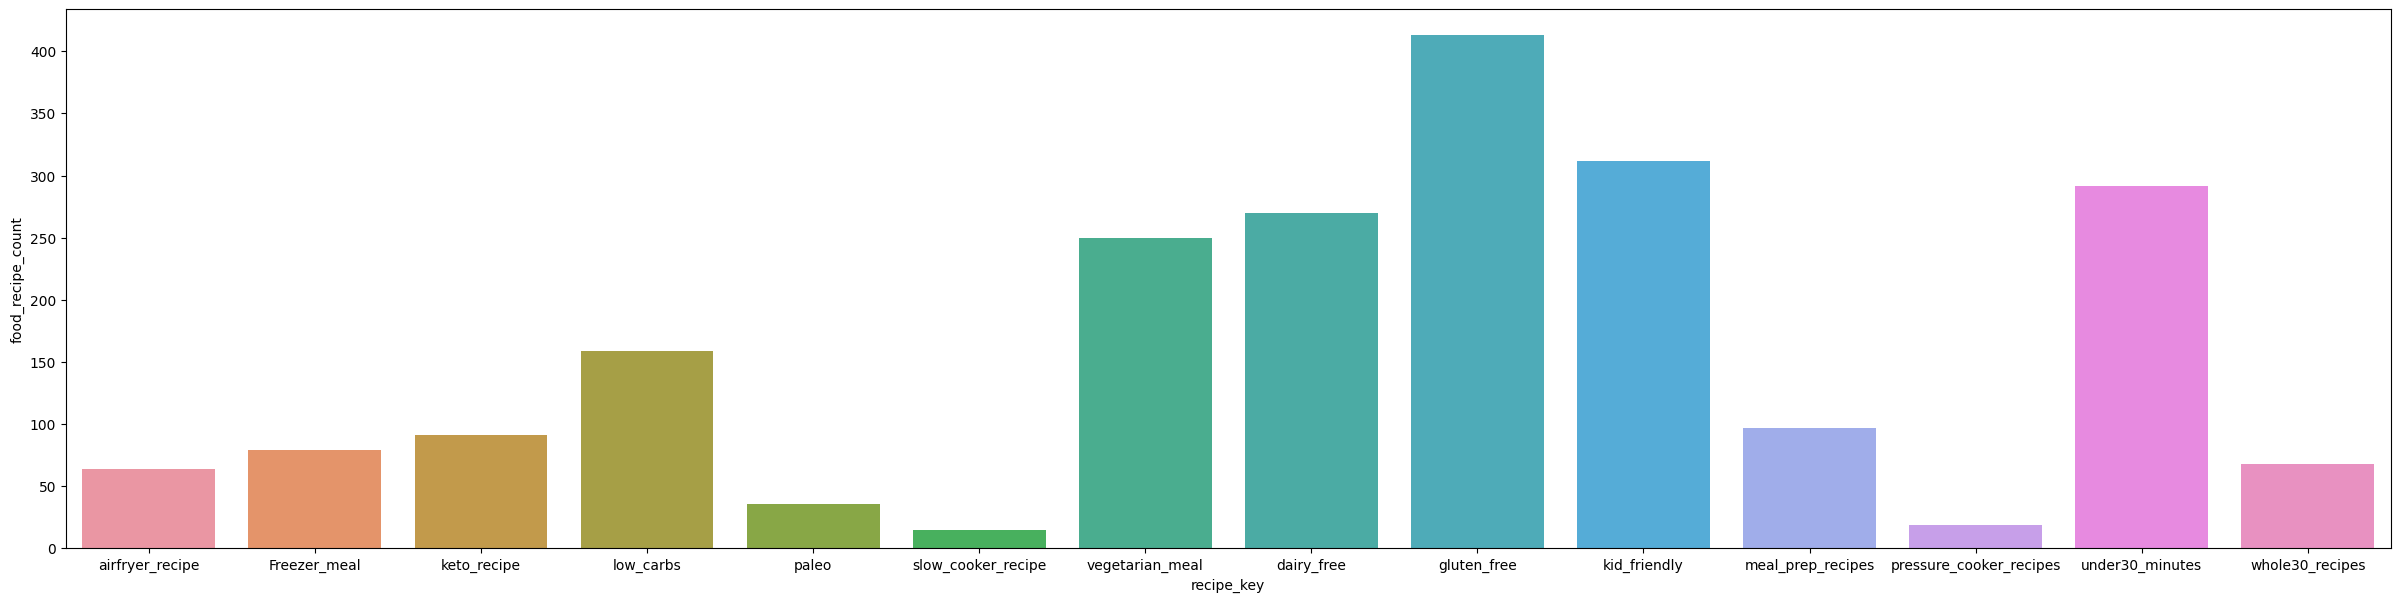

In [ ]:
# Shows the distribution 14 recipe keys
# The recipe key with the highest frequency(400+ recipes) is 'gluten free'. This implies 70% of the recipes are gluten free
# Other popular recipe keys are Kid friendly, under 30 minutes ,daiary free, and Vegeterian meal respectively.
# the least common recipe key groups are slow cooker recipes and pressure cooker recipes.

df_col =recipe_data.columns[13:].tolist()
df_data = recipe_data[recipe_data.columns[13:]].sum().tolist()

df = pd.DataFrame({'recipe_key':df_col,'food_recipe_count':df_data})


plt.figure(figsize=(30,7))
sns.barplot(data=df, x='recipe_key', y='food_recipe_count')
plt.show()

## Interaction with the user
This part enable user to search through the scraped data, and get details about the recipe scraped.
The user performs the following task:
- Input a calorie range
- Input a point range

###### Result
Our code outputs the first 5 foods sorted based on calories and points.
The result shows the image, wpp point, calories and summary.

In [ ]:
recipe_data_copy = recipe_data

In [ ]:
'''These function returns the a sorted list of recipe data within a given range of calories and WW point.
The result is sorted in order of clories and WPP respectively.'''
def get_top5_recipe(cal_range:list, wpp_range:list)-> pd.DataFrame:
  min_cal = cal_range[0]
  max_cal = cal_range[1]
  min_wpp = wpp_range[0]
  max_wpp = wpp_range [1]
  if cal_range[0]> cal_range[1]:
    min_cal = cal_range[1]
    max_cal = cal_range[0]

  if wpp_range[0]> wpp_range[1]:
    min_wpp = wpp_range[1]
    max_wpp = wpp_range [0]

  filtered_values = np.where((recipe_data['recipe_cal']>= min_cal) & (recipe_data['recipe_cal']<= max_cal) & (recipe_data['recipe_wpp']>=min_wpp) & (recipe_data['recipe_wpp']< max_wpp))
  filtered_data = recipe_data.loc[filtered_values]
  sorted_recipe_data = filtered_data.sort_values(by = ['recipe_cal', 'recipe_wpp'], ascending = [True, True], na_position='last', kind='quicksort', ignore_index=True)


  return sorted_recipe_data


In [ ]:
# prompt to two numbers seperated by comma. The integers will act the range  calories then wpp respectively
cal_range = list(int(num) for num in input("Enter the calories range you want to search for separated by comma. (Do not add any special characters other than the commer that seperates the numbers) ").strip().split(','))[:2]
wpp_range = list(int(num) for num in input("Enter the calories range you want to search for separated by comma. (Do not add any special characters other than the commer that seperates the numbers) ").strip().split(','))[:2]
print(f"\n Your Input: \n    calory range is: {cal_range} \n    WWP range is: {wpp_range}")

result = get_top5_recipe(cal_range, wpp_range)[['name','image_url','recipe_wpp','recipe_cal','recipe_summary']]


Enter the calories range you want to search for separated by comma. (Do not add any special characters other than the commer that seperates the numbers) 1,500
Enter the calories range you want to search for separated by comma. (Do not add any special characters other than the commer that seperates the numbers) 5,8

 Your Input: 
 calory range is: [1, 500] 
 WWP range is: [5, 8]


In [ ]:
print(f" There are {result.shape[0]} recipes within the calories range {cal_range} and wpp range {wpp_range}.\n\n Below are the top five recipes in ascending order")

top_5_result = result.head()
header_html = '<tr> <th>S/N</th><th>Recipe Name</th><th>Image</th><th>Recipe WPP</th> <th>Recipe Calories</th> <th>Recipe Summary</th></tr>'

def display_row(row):
  numb_html = f"<td><b>**</b></td>"
  name_html = f"<td><b></b> {row['name']}</td>"
  image_html = f'<td><img src="{row["image_url"]}" width="200" height="200"></td>'
  other_columns = [f'<td><b></b> {row[col]}</td>' for col in row.index if col not in ('image_url', 'name')]
  return f'<tr>{numb_html}<br>{name_html}<br>{image_html}<br>{"<br>".join(other_columns)}</tr>'


result_ =pd.DataFrame( top_5_result.apply(display_row,axis=1),columns=['HTML'])
table_html = f'<div><table border=1>{header_html}{"".join(result_["HTML"])}</table></div>'

HTML(table_html)

 There are 212 recipes within the calories range [1, 500] and wpp range [5, 8].

 Below are the top five recipes in ascending order


S/N,Recipe Name,Image,Recipe WPP,Recipe Calories,Recipe Summary
**,Homemade Ferrero Rocher (Hazelnut) Date Balls,,5.0,90.0,"Healthy Chocolate Hazelnut Date Balls, inspired by Ferrero Rocher are made with hazelnuts, dates, pumpkin puree, and cocoa powder."
**,Pizzelle Cookies,,5.0,91.0,"Italian Pizzelle Cookies are light and crisp, made lighter with less butter and sugar for a tasty holiday treat."
**,Pumpkin Chocolate Chip Cookies,,5.0,95.0,"These soft Pumpkin Chocolate Chip Cookies, made with pumpkin puree, pumpkin spice, and cream cheese, have a cake-like texture and lots of pumpkin flavor!"
**,Pumpkin Bread Recipe,,5.0,103.0,"Warm up your kitchen with the scent of pumpkin spice and bake this pumpkin bread recipe, perfect for cozy, cool fall days."
**,Strawberry Cheesecake Dip,,6.0,103.0,Strawberry Cheesecake Dip tastes just like cheesecake in dip form – perfect for serving with fresh fruit or graham crackers.
